In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflowjs as tfjs
import numpy as np
import pandas as pd
import os
from math import sqrt
#tf.compat.v1.disable_eager_execution()
from sklearn.preprocessing import MinMaxScaler
tf.__version__

'2.4.1'

In [3]:
df=pd.read_csv('/home/nusa/Documents/ProjectBangkit2021/data/Merged3.1.csv')

In [4]:
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/1/2010,60,4,73.0,27,14,73,CO,SEDANG,JAKARTA
1,1/2/2010,32,2,16.0,33,9,33,O3,BAIK,JAKARTA
2,1/3/2010,27,2,19.0,20,9,27,PM10,BAIK,JAKARTA
3,1/4/2010,22,2,16.0,15,6,22,PM10,BAIK,JAKARTA
4,1/5/2010,25,2,17.0,15,8,25,PM10,BAIK,JAKARTA
...,...,...,...,...,...,...,...,...,...,...
4083,3/27/2021,62,49,13.0,63,33,91,PM25,SEDANG,JAKARTA
4084,3/28/2021,57,43,15.0,71,31,78,PM25,SEDANG,JAKARTA
4085,3/29/2021,65,48,19.0,67,37,91,PM25,SEDANG,JAKARTA
4086,3/30/2021,59,42,15.0,55,30,76,PM25,SEDANG,JAKARTA


In [5]:
df.values.shape

(4088, 10)

In [6]:
df.drop('critical', axis=1, inplace=True)
df.drop('categori', axis=1, inplace=True)
df.drop('lokasi_spku', axis=1, inplace=True)

In [7]:
df.values.shape

(4088, 7)

In [8]:
df.head(1)

,tanggal,pm10,so2,co,o3,no2,max
0,1/1/2010,60,4,73.0,27,14,73


In [9]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4088 entries, 2010-01-01 to 2021-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    4088 non-null   int64  
 1   so2     4088 non-null   int64  
 2   co      4088 non-null   float64
 3   o3      4088 non-null   int64  
 4   no2     4088 non-null   int64  
 5   max     4088 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 223.6 KB


In [10]:
df.head()

,pm10,so2,co,o3,no2,max
tanggal,,,,,,
2010-01-01,60,4,73.0,27,14,73
2010-01-02,32,2,16.0,33,9,33
2010-01-03,27,2,19.0,20,9,27
2010-01-04,22,2,16.0,15,6,22
2010-01-05,25,2,17.0,15,8,25


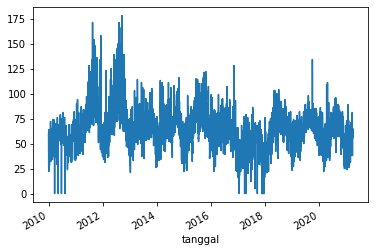

In [11]:
df['pm10'].plot();

In [12]:
target_names = ['pm10', 'so2', 'co', 'o3', 'no2']

In [13]:
shift_steps = 1

In [14]:
df_targets = df[target_names].shift(-shift_steps)

In [15]:
df[target_names].head(shift_steps + 5)

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60,4,73.0,27,14
2010-01-02,32,2,16.0,33,9
2010-01-03,27,2,19.0,20,9
2010-01-04,22,2,16.0,15,6
2010-01-05,25,2,17.0,15,8
2010-01-06,30,3,22.0,19,11


In [16]:
df_targets.head(5)

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,32.0,2.0,16.0,33.0,9.0
2010-01-02,27.0,2.0,19.0,20.0,9.0
2010-01-03,22.0,2.0,16.0,15.0,6.0
2010-01-04,25.0,2.0,17.0,15.0,8.0
2010-01-05,30.0,3.0,22.0,19.0,11.0


In [17]:
df_targets.tail()

,pm10,so2,co,o3,no2
tanggal,,,,,
2021-03-27,57.0,43.0,15.0,71.0,31.0
2021-03-28,65.0,48.0,19.0,67.0,37.0
2021-03-29,59.0,42.0,15.0,55.0,30.0
2021-03-30,56.0,43.0,18.0,48.0,25.0
2021-03-31,NaN,NaN,NaN,NaN,NaN


In [18]:
x_data = df.values[0:-shift_steps]

In [19]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (4087, 6)


In [20]:
y_data = df_targets.values[:-shift_steps]

In [21]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (4087, 5)


In [22]:
num_data = len(x_data)
num_data

4087

In [23]:
train_split = 0.9

In [24]:
num_train = int(train_split * num_data)
num_train

3678

In [25]:
num_test = num_data - num_train
num_test

409

In [26]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

4087

In [27]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

4087

In [28]:
num_x_signals = x_data.shape[1]
num_x_signals

6

In [29]:
num_y_signals = y_data.shape[1]
num_y_signals

5

In [30]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 314.0


In [31]:
x_scaler = MinMaxScaler()

In [32]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [33]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [34]:
x_test_scaled = x_scaler.transform(x_test)

In [35]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [36]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(3678, 6)
(3678, 5)


In [37]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    while True:
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        for i in range(batch_size):
            idx = np.random.randint(num_train - sequence_length)
            
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [38]:
batch_size = 128

In [39]:
sequence_length = 366

In [40]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [41]:
x_batch, y_batch = next(generator)

In [42]:
print(x_batch.shape)
print(y_batch.shape)

(128, 366, 6)
(128, 366, 5)


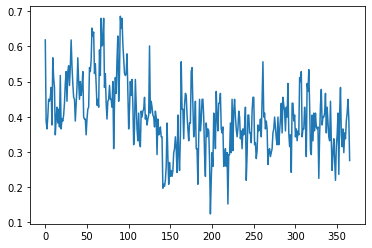

In [43]:
batch = 0
signal = 0
seq = x_batch[batch, :, signal]
plt.plot(seq)

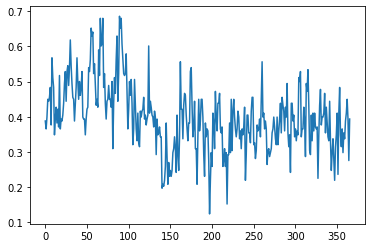

In [44]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [45]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [46]:
path_checkpoint = 'checkpoint.keras'
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [47]:
callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                           patience=5, verbose=1)

In [48]:
callback_tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./logs/',
                                                      histogram_freq=0,
                                                      write_graph=False)

In [49]:
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                          factor=0.1,
                                                          min_lr=1e-4,
                                                          patience=0,
                                                          verbose=1)

In [50]:
model = tf.keras.models.Sequential([tf.keras.layers.GRU(units=512,
                                                        return_sequences=True,
                                                        input_shape=(None, num_x_signals,),
                                                        activation='tanh'),
                                    tf.keras.layers.GRU(units=512,
                                                        return_sequences=True,
                                                        input_shape=(None, num_x_signals,),
                                                        activation='tanh'),
                                    tf.keras.layers.Dense(num_y_signals, activation='sigmoid')
])
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(loss=tf.keras.losses.MSE,
              optimizer=optimizer,
              metrics=["mae"])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 512)         798720    
_________________________________________________________________
gru_1 (GRU)                  (None, None, 512)         1575936   
_________________________________________________________________
dense (Dense)                (None, None, 5)           2565      
Total params: 2,377,221
Trainable params: 2,377,221
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.fit(x=generator,
          epochs=20,
          steps_per_epoch=100,
          validation_data=validation_data,
          callbacks = [callback_early_stopping,
                       callback_checkpoint,
                       callback_tensorboard,
                       callback_reduce_lr])

Epoch 1/20
100/100 [==============================] - 63s 614ms/step - loss: 0.0049 - mae: 0.0475 - val_loss: 0.0279 - val_mae: 0.0915

Epoch 00001: val_loss improved from inf to 0.02786, saving model to checkpoint.keras
Epoch 2/20
100/100 [==============================] - 61s 615ms/step - loss: 0.0048 - mae: 0.0468 - val_loss: 0.0281 - val_mae: 0.0925

Epoch 00002: val_loss did not improve from 0.02786
Epoch 3/20
100/100 [==============================] - 62s 625ms/step - loss: 0.0048 - mae: 0.0465 - val_loss: 0.0282 - val_mae: 0.0931

Epoch 00003: val_loss did not improve from 0.02786
Epoch 4/20
100/100 [==============================] - 63s 630ms/step - loss: 0.0047 - mae: 0.0463 - val_loss: 0.0284 - val_mae: 0.0937

Epoch 00004: val_loss did not improve from 0.02786
Epoch 5/20
100/100 [==============================] - 63s 635ms/step - loss: 0.0047 - mae: 0.0460 - val_loss: 0.0286 - val_mae: 0.0937

Epoch 00005: val_loss did not improve from 0.02786
Epoch 6/20
100/100 [===========

In [96]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [97]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 1s 549ms/step - loss: 0.0279 - mae: 0.0915


In [98]:
print("loss (test-set):", result)

loss (test-set): [0.027855319902300835, 0.09149332344532013]


In [52]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    if train:
        x = x_train_scaled
        y_true = y_train
    else:
        x = x_test_scaled
        y_true = y_test
    
    end_idx = start_idx + length
    
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    x = np.expand_dims(x, axis=0)

    y_pred = model.predict(x)
    
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    for signal in range(len(target_names)):
        signal_pred = y_pred_rescaled[:, signal]
        
        signal_true = y_true[:, signal]

        plt.figure(figsize=(7,3))
        
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        #p = plt.axvspan(0, 50, facecolor='black', alpha=0.15)
        
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

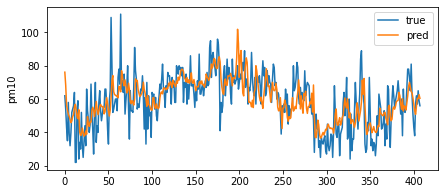

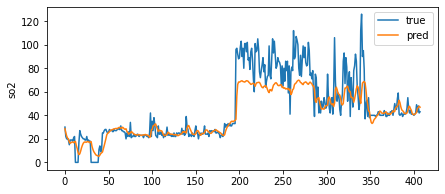

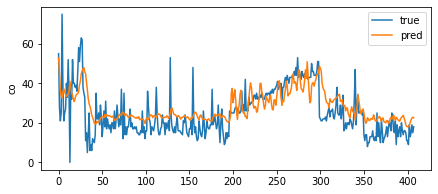

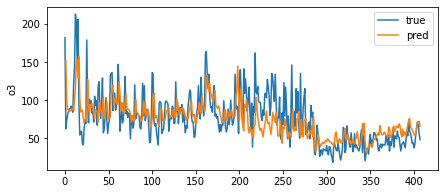

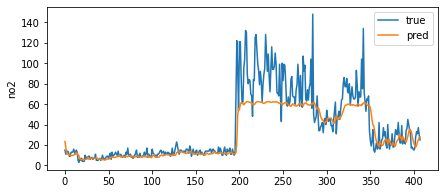

In [53]:
plot_comparison(start_idx=1, length=409, train=False)

In [101]:
#model.save("modelPredictall(=0.027855319902300835)")

In [51]:
#model = tf.keras.models.load_model('modelPredictall(=0.032510507851839066).h5')
#model = tf.keras.models.load_model('modelPredictall(=0.02950630523264408).h5')
model = tf.keras.models.load_model('modelPredict')
#model = tf.keras.models.load_model('modelPredictall(=0.023562125861644745).h5')

In [114]:
x = x_test_scaled
y_true = y_test
start_idx=1 
length=10
end_idx = start_idx + length
x = x[start_idx:end_idx]
y_true = y_true[start_idx:end_idx]
x = np.expand_dims(x, axis=0)
y_pred = model.predict(x)
y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])

In [115]:
#x=x_test_scaled*inverse
#x=x_scaler.inverse_transform(x_test_scaled)
#x

In [116]:
x_test[1:409]

array([[ 43.,  21.,  30., 170.,  12., 170.],
       [ 62.,  30.,  55., 182.,  15., 182.],
       [ 54.,  22.,  28.,  62.,  11.,  62.],
       ...,
       [ 57.,  43.,  15.,  71.,  31.,  78.],
       [ 65.,  48.,  19.,  67.,  37.,  91.],
       [ 59.,  42.,  15.,  55.,  30.,  76.]])

In [118]:
x = x_test
x =x[start_idx:end_idx]
x

[array([[ 43.,  21.,  30., 170.,  12., 170.],
        [ 62.,  30.,  55., 182.,  15., 182.]]),
 array([[54., 22., 28., 62., 11., 62.],
        [43., 20., 21., 73., 13., 73.]]),
 array([[35., 20., 25., 80., 14., 80.],
        [58., 19., 75., 85., 13., 85.]]),
 array([[39., 15., 37., 88.,  9., 88.],
        [32., 19., 21., 89.,  9., 89.]]),
 array([[40., 19., 25., 92., 13., 92.]]),
 array([[52., 19., 27., 89., 13., 89.]])]

In [111]:
z=np.array([[ 43.,  21.,  30., 170.,  12., 170.],
            [ 62.,  30.,  55., 182.,  15., 182.],
           ])
z=x_scaler.transform(z)
#z=z/inverse
z=np.expand_dims(z, axis=0)
z
z_pred = model.predict(z)
z_pred*inverse

array([[[ 76.14628863,  28.61923456,  52.91745383, 152.63712752,
          23.340471  ],
        [ 68.33755559,  25.1007514 ,  44.55984557, 152.3293733 ,
          17.55252895]]])

In [110]:
print('{"instances": \n',np.array2string(z, separator=', '),'\n}')

{"instances": 
 [[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
   0.54140127],
  [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
   0.57961783]]] 
}


In [58]:
x_test_scaled[1:10]

array([[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
        0.54140127],
       [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
        0.57961783],
       [0.30337079, 0.30555556, 0.20895522, 0.19745223, 0.17460317,
        0.19745223],
       [0.24157303, 0.27777778, 0.15671642, 0.23248408, 0.20634921,
        0.23248408],
       [0.19662921, 0.27777778, 0.18656716, 0.25477707, 0.22222222,
        0.25477707],
       [0.3258427 , 0.26388889, 0.55970149, 0.27070064, 0.20634921,
        0.27070064],
       [0.21910112, 0.20833333, 0.2761194 , 0.28025478, 0.14285714,
        0.28025478],
       [0.17977528, 0.26388889, 0.15671642, 0.28343949, 0.14285714,
        0.28343949],
       [0.2247191 , 0.26388889, 0.18656716, 0.29299363, 0.20634921,
        0.29299363]])

In [55]:
y_true

array([[ 62.,  30.,  55., 182.,  15.],
       [ 54.,  22.,  28.,  62.,  11.],
       [ 43.,  20.,  21.,  73.,  13.],
       [ 35.,  20.,  25.,  80.,  14.],
       [ 58.,  19.,  75.,  85.,  13.],
       [ 39.,  15.,  37.,  88.,   9.],
       [ 32.,  19.,  21.,  89.,   9.],
       [ 40.,  19.,  25.,  92.,  13.],
       [ 52.,  19.,  27.,  89.,  13.],
       [ 54.,  18.,  40.,  84.,  13.]])

In [54]:
z=np.array([[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619, 0.54140127],
             [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524, 0.57961783],
             [0.30337079, 0.30555556, 0.20895522, 0.19745223, 0.17460317, 0.19745223]]])
#z=np.expand_dims(z, axis=0)
z

array([[[0.24157303, 0.29166667, 0.2238806 , 0.54140127, 0.19047619,
         0.54140127],
        [0.34831461, 0.41666667, 0.41044776, 0.57961783, 0.23809524,
         0.57961783],
        [0.30337079, 0.30555556, 0.20895522, 0.19745223, 0.17460317,
         0.19745223]]])

In [57]:
z=model.predict(z)
z=z*inverse
pm10, so2, co, o3, no2 = np.dsplit(z, 5)
print(pm10)
print(so2)
print(co)
print(o3)
print(no2)

[[[64.96740764]
  [50.46944284]
  [44.42704025]]]
[[[27.75417709]
  [21.60859466]
  [18.29098535]]]
[[[54.03923112]
  [44.31462801]
  [39.80424863]]]
[[[112.19915712]
  [ 92.25686717]
  [ 87.32832658]]]
[[[23.2341249 ]
  [18.31854719]
  [16.31937531]]]


In [1]:
y_pred

In [89]:
y_pred_rescaled

array([[ 76.146286 ,  28.619234 ,  52.917454 , 152.63713  ,  23.340473 ],
       [ 68.33756  ,  25.100754 ,  44.559853 , 152.32936  ,  17.552528 ],
       [ 56.417904 ,  22.368399 ,  37.04921  ,  96.59109  ,  11.9639015],
       [ 53.447258 ,  20.564726 ,  33.62974  ,  87.58977  ,  10.856805 ],
       [ 50.909435 ,  19.9299   ,  32.62447  ,  87.69547  ,  10.974268 ],
       [ 49.60847  ,  17.368273 ,  35.878647 ,  84.78273  ,  10.286073 ],
       [ 47.89903  ,  16.216208 ,  37.2325   ,  86.52861  ,   9.9123745],
       [ 45.855965 ,  16.807095 ,  35.57951  ,  86.06564  ,   9.482981 ],
       [ 46.902546 ,  17.229364 ,  34.472935 ,  88.825294 ,   9.723587 ],
       [ 49.48386  ,  17.310919 ,  33.433624 ,  88.937065 ,   9.910923 ]],
      dtype=float32)

In [65]:
error=y_true-y_pred_rescaled

In [66]:
RMSE=sum((error**2)**0.5)/num_test
RMSE

array([ 9.80446512,  8.77282145,  7.24068196, 18.02030243, 10.63599659])

In [72]:
RMSE=sum((error**2)**0.5)/num_test
RMSE

array([ 9.80446512,  8.77282145,  7.24068196, 18.02030243, 10.63599659])

In [270]:
inverse= np.max(x_data,axis=0)
inverse

array([178., 126., 134., 314., 148., 314.])

In [165]:
#tfjs.converters.save_keras_model(model, '/home/nusa/Desktop/model')

In [56]:
inverse= np.max(y_train,axis=0)
inverse

array([178.,  72., 134., 314.,  63.])